# Introduction to Scikit-Learn (sklearn)

This notebook demonstrate some of the most useful functions of the Scikit-Learn library

What we will cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm (model) for our problems
3. Fit the model/algorithm and use it to make prediction on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]


In [53]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf.fit(X_train, y_train);

In [16]:
# Make a prediction
y_label = clf.predict(np.array[(0,2,3,4)])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [18]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [19]:
y_test

158    1
229    0
215    0
107    1
44     1
      ..
206    0
169    0
180    0
4      1
234    0
Name: target, Length: 61, dtype: int64

In [20]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [21]:
clf.score(X_test, y_test)

0.8360655737704918

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.79      0.94      0.86        32

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [24]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 2, 30]])

In [26]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [31]:
# 5. Improve a model
# Try different amount of n_esitimators
np.random.seed(45)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set:  {clf.score(X_test, y_test) * 100:.2f}%')
    print("")

Trying model with 10 estimators...
Model accuracy on test set:  78.69%

Trying model with 20 estimators...
Model accuracy on test set:  83.61%

Trying model with 30 estimators...
Model accuracy on test set:  80.33%

Trying model with 40 estimators...
Model accuracy on test set:  78.69%

Trying model with 50 estimators...
Model accuracy on test set:  78.69%

Trying model with 60 estimators...
Model accuracy on test set:  81.97%

Trying model with 70 estimators...
Model accuracy on test set:  83.61%

Trying model with 80 estimators...
Model accuracy on test set:  80.33%

Trying model with 90 estimators...
Model accuracy on test set:  78.69%



In [33]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [34]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

In [36]:
# Let's make an outline of things to cover:
currently_covering = [
    "0. An end-to-end scikit-learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problem",
    "3. Fit the model/algorithm and use it to make predictions",
    "4. Evaluating a model",
    "5. Improving a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [37]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Getting the data ready to be used with ML

Three main things we have to do:
1. Split the data into features and labels (usually features `X` and label `y`)
1. Filling (also called imputing) or disregarding missing values
1. Converting non-numerical values to numerical values (also called feature encoding)

In [38]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [41]:
# Split the data
X = heart_disease.drop("target", axis=1)
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [43]:
y = heart_disease["target"]
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [46]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical 


In [49]:
# Use another data set to demo conversion to numerical data
ext_car_sales = pd.read_csv("data/car-sales-extended.csv")
ext_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [52]:
# Split into X/y:
X = ext_car_sales.drop("Price", axis=1)
y = ext_car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [55]:
# Because of the error above that we have to convert categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [56]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [58]:
# Another way we can do this
dummies = pd.get_dummies(ext_car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [59]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Filling them with some values (also known as imputation)
2. Remove the samples with missing data altogether

In [69]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [70]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


#### Option 1:  Fill missing data with Pandas

In [76]:
# Fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" columnn
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [77]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [74]:
# Let's try and convert our data to numbers just like above

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [79]:
# Remove rows with missing "Prices"
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [80]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [82]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [83]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [85]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [86]:
# Drop the rows with no label
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [88]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [89]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [90]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [91]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [92]:
# Let's try again to convert categorical data to numbers:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [93]:
# Now we've got our data as numbers and filled (no missing values), Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem

Something to note:

* Sklearn refers to machine learning models/algorithm as _estimators_
* Classification problem - predicting a category (heart disease)
    * Sometimes you will see `clf` (short for classifier) used as a classification estimator
* Regresion problem - predicting a number (selling price of a car).

If using Sklearn and not sure what model to use, might want to take a look at the [Sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


### 2.1 Picking a Machine Learning model for a regression problem

Let's use the California Housing Dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [2]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Import Ridge algorithm/estimator
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Check the score of the model (on the test set)
ridge_score = ridge_model.score(X_test, y_test)
ridge_score             

0.5758549611440126

In [9]:
# Try an ensemble model (an ensemble is a combination of smaller models used to get better prediction than just one model)
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

# Check the score of the model
RF_score = RF_model.score(X_test, y_test)
RF_score

0.8066196804802649

## 2.2 Picking a machine learning model for a classification problem

In [11]:
# Using the sklearn load_iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# Add the target column
iris_df["target"] = iris["target"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# Set the seed
np.random.seed(42)

# Split the dataset into training and test sets
X = iris_df.drop("target", axis=1)
y= iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Try the linearSVC model
from sklearn.svm import LinearSVC

linearSVC_model = LinearSVC(dual='auto')

# Train the model
linearSVC_model.fit(X_train, y_train)

# Score the model
linear_svc_score = linearSVC_model.score(X_test, y_test)
linear_svc_score

1.0

In [22]:
# Try the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

# train the model
rfc_model.fit(X_train, y_train)

# evaluate the model
rfc_score = rfc_model.score(X_test, y_test)
rfc_score

1.0

## 3. Fit the model on our data and use it to make predictions

### 3.2 Make predictions using an ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [30]:
# Use a trained model to make predictions
y_preds = rfc_model.predict(X_test)
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [32]:
# Compare the predictions to truth lablels to evaluate the model
np.mean(y_preds == y_test)

1.0

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

1.0

## Make predictions with predict_proba()


In [35]:
# predict_proba() returns probabilities of a classification label
rfc_model.predict_proba(X_test[:5])

array([[0.  , 1.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.99, 0.01],
       [0.  , 0.82, 0.18]])

In [36]:
# Let's predict() on the same data...
rfc_model.predict(X_test[:5])

array([1, 0, 2, 1, 1])

`predict()` can also be used for regression models

In [37]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc_model = RandomForestRegressor()

# Train our model
rfc_model.fit(X_train, y_train)

# Make predictions
y_preds = rfc_model.predict(X_test)


In [39]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [40]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

## Trying to calculate this my way, not knowing how to really do it

In [41]:
differences = y_preds - y_test
differences

20046    0.016840
3024     0.296940
15663   -0.071414
20484    0.354290
9814    -0.448240
           ...   
15362   -0.412620
16623   -0.720240
18086   -0.163632
2144    -0.005180
3665     0.164010
Name: target, Length: 4128, dtype: float64

In [42]:
avg_diff_percentage = differences.mean() / y_test.mean() * 100
avg_diff_percentage

0.5891437292224222

## Using the ZTM taught way

In [43]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

## 4. Evaluating a Machine Learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

Read more about it [here](https://scikit-learn.org/stable/modules/model_evaluation.html)


## 4.1 Evaluating a model with the `score` method

In [44]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
rfc = RandomForestClassifier()

# Fit classifier to training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Scoring
rfc_score = rfc.score(X_test, y_test)
rfc_score

0.8524590163934426

In [53]:
# Let's use the `scoree method on our regression problem
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create regressor model instance
rfr = RandomForestRegressor(n_estimators=100)

# Fit regressor to training data
rfr.fit(X_train, y_train)

# Scoring
rfr_score = rfr.score(X_test, y_test)
rfr.score(X_train, y_train)

0.924203269641995

## 4.2 Evaluating a model using the `scoring` parameter

In [2]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create regressor model instance
rfc = RandomForestClassifier(n_estimators=100)

# Fit regressor to training data
rfc.fit(X_train, y_train);

In [6]:
# Score from `score`
rfc.score(X_test, y_test)

0.8524590163934426

In [8]:
# Scores from 5-fold cross-validation
cross_val_score(rfc, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [9]:
np.random.seed(42)

# Single training and test split score
rfc_single_score = rfc.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y, cv=5))

# Compare the two 
rfc_single_score, rfc_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y, cv=5)
cv_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [14]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cv_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [17]:
from sklearn.metrics import roc_curve

np.random.seed(42)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:5], len(y_probs)

(array([[0.95, 0.05],
        [0.38, 0.62],
        [0.45, 0.55],
        [0.86, 0.14],
        [0.21, 0.79]]),
 61)

In [18]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47])

In [20]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
       0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
       0.86206897, 1.        ])

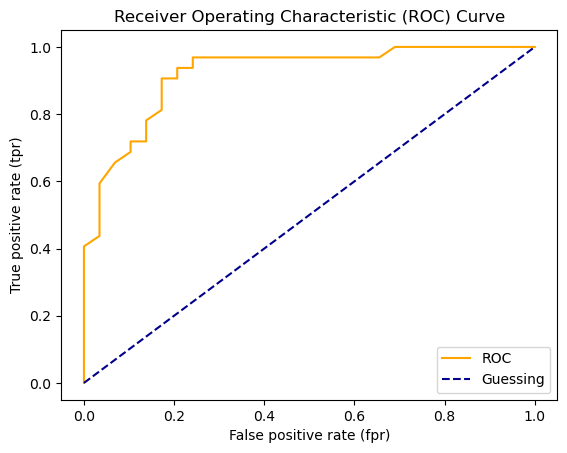

In [22]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9202586206896551

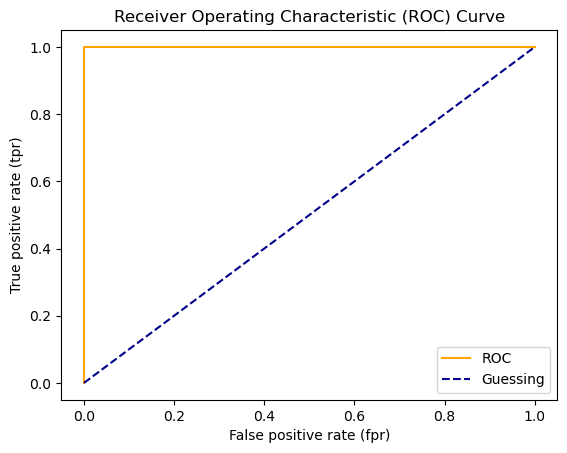

In [25]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [26]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, it gives you an idea of where the model is getting confused.

In [27]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [28]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


In [29]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/anhbamuoi/Code/ml_sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py312hecd8cb5_0         563 KB
    ------------------------------------------------------------
                                           Total:         563 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-64::seaborn-0.12.2-py312hecd8cb5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


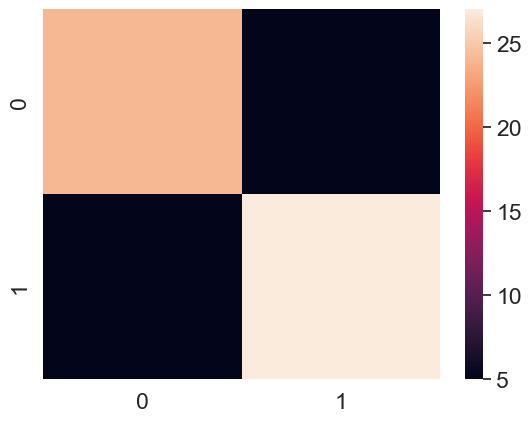

In [30]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-Learn 

To use the new methods of creating a confusion matrix with Scikit-Leaarn you will need sklearn version 1.0+

Method 1).

In [31]:
import sklearn
sklearn.__version__

'1.3.0'

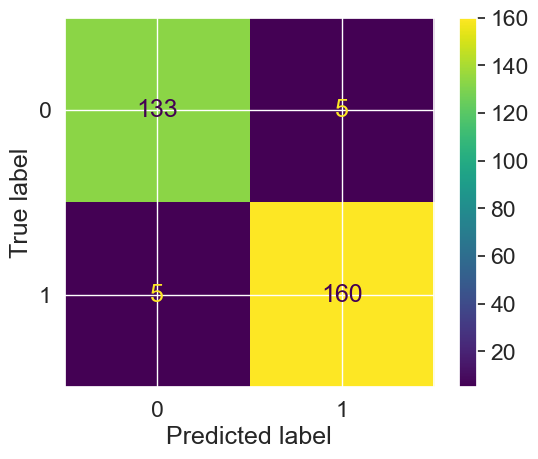

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

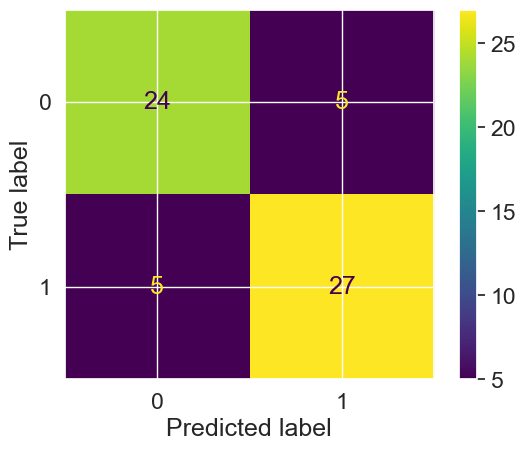

In [33]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

## Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [35]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # One posive case

disease_preds = np.zeros(10000) # Model predicts every case is 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/anhbamuoi/Code/ml_sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anhbamuoi/Code/ml_sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anhbamuoi/Code/ml_sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression Model Evaluation Metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we'll cover are:
1. $R^2$ (pronounced r-squared) or coefficient of determination
1. Mean absolute error (MAE)
1. Mean squared error (MSE)

In [38]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [40]:
from sklearn.ensemble import RandomForestRegressor

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df['target'] = housing['target']

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
model.score(X_test, y_test)

0.8066196804802649

#### Using R-squared model

In [42]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [43]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [44]:
# If our model were perfect
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

#### Using Mean Absolute Error

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test,
                    y_pred=y_test_mean)

0.9027197890329232

In [46]:
### The ZTM way:
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test,
                          y_pred=y_preds)
mae

0.3265721842781009

In [47]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = y_test - y_preds
df

,actual values,predicted values,differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,-0.354290
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


In [48]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

#### Using Mean Squared Error

In [50]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_true=y_test,
                         y_pred=y_preds)
mse

0.2534073069137548

In [51]:
df["squared_diff"] = np.square(df["differences"])
df

,actual values,predicted values,differences,squared_diff
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [53]:
# Calculate MSE by hand
np.square(df["differences"]).mean()

0.2534073069137548

### 4.2.3 Finally using the `scoring` parameter

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [55]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 
# If scoring is none, estimator's default scoring evaluation metric is used. In this case, it's classication, so the default is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [57]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [62]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [64]:
# Recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


#### Let's see the scoring parameter being used for a `Regression` problem

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)


In [67]:
# Coefficient of determination (R-squared)
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [73]:
# Mean squared error
np.random.seed(42)

cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43011254261460774

In [74]:
# Mean absolute error
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4662123287693799

### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")

print(f"Precision: {precision_score(y_test, y_preds)}")

print(f"Recall: {recall_score(y_test, y_preds)}")

print(f"F1: {f1_score(y_test, y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor(n_estimators=100)

# Fit model
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print(f"Regressor metrics on the test set")
print(f"R2: {r2_score(y_test, y_preds)}")an
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regressor metrics on the test set
R2: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model


In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [82]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Improving hyperparameters by hand

Let's make three sets: training, validation, and test.  Then, we are going to try to adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [86]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [87]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation, and test sets:
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [88]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [90]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomRandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Set up RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,  # The number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)
                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [91]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [92]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameters tuning using GridSearchCV

In [93]:
# Check out grid created previously
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [94]:
# Reduce the grid because current iterations would be huge: 6 x 5 x 2 x 3 x 3 x 5 folds = 2700 iterations
# Just create a new grid with parameters around the previously found best params with RandomizedSearchCV

grid_2 = {"n_estimators": [150, 200, 250],
          "max_depth": [None, 1],
          "max_features": ["sqrt"],
          "min_samples_split": [6],
          "min_samples_leaf": [1, 2]}

In [95]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomRandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Set up GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 1], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [96]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [97]:
# Make predictions with it
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### Let's compare our different models metrics

<Axes: >

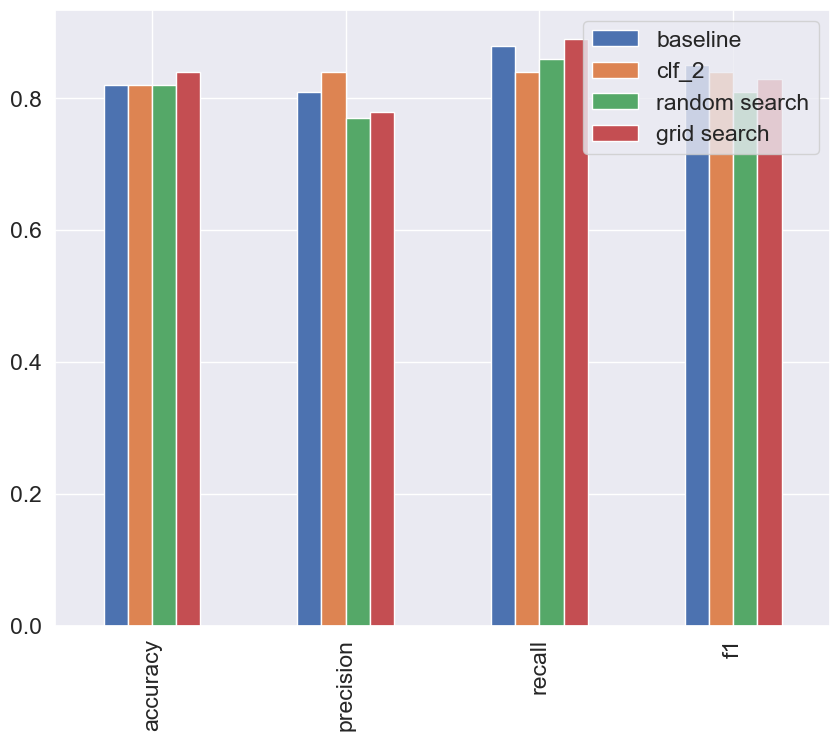

In [100]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics, 
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8))

## 6. Saving and Loading a Machine Learning Model

Two ways to save and load a machine-learning model
1. With Python `pickle` module
2. With the `joblib` module

**Pickle**

In [101]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("grid_search_random_forest_model_1.pkl", "wb"))

In [102]:
# Load a saved module
loaded_pickle_module = pickle.load(open("grid_search_random_forest_model_1.pkl", "rb"))

In [105]:
# Make some predictions
pickle_y_preds = loaded_pickle_module.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [106]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [107]:
# Import a saved joblib model
loaded_joblib_model = load("gs_random_forest_model_1.joblib")

In [109]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7 Putting it all together

In [111]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [112]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [114]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Steps we want to do in one cell:

1. Fill missing data
2. Convert data to numbers
3. Build a model on data

In [119]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Set up pre-processing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a pre-processing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                       ])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

### It's possible to use *GridSearchCV* or *RandomizedSearchCV* with our `Pipeline`.

In [122]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [123]:
gs_model.score(X_test, y_test)

0.2848784564026805

### That's an improvement of 6%+